# 图像运算-点运算

## 1.线性点运算

线性点运算指灰度图像变换函数$f$为线性函数时的运算。假设$D_a$为输入灰度值，$D_b$为输出灰度值，则函数$f$的形式如下：

$$f(D_a) = aD_a + b = D_b$$

当a > 1时，图像对比度增大；当a < 1时，图像对比度减小；当a = 1,b = 0时，图像对比度不变，相当复制；当a = 1,$b \neq 1$时，图像对比度增加或减小。

线性点运算除了调整灰度图像的对比度外还可以应用于灰度标准化。假设灰度图像为I[W][H]，其中W表示宽度，H表示高度。那么，灰度图像的平均灰度和标准差由以下公式可以计算得到：

平均灰度：

$$\overline{\mu} = \frac{1}{WH}\sum_{i=0}^{W-1}\sum_{j=0}^{H-1}I[i][j]$$

标准差：

$$\overline{\delta^2} = \frac{1}{WH}\sum_{i=0}^{W-1}\sum_{j=0}^{H-1}(I[i][j] - \overline{\mu})^2$$

将以上两个公式变换为均值和方差相同的灰度变换函数（线性映射），其形式如下：

$$f(I[i][j]) = \frac{\delta_0}{\overline{\mu}}(I[i][j] - \overline{\mu}) + \mu_0$$ 

其中，$\delta_0$和$\mu_0$为给定的变换函数变量。灰度标准化可以用来生成一些常用的平均模型。

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import skimage as sk
import skimage.io as io
import skimage.color as color

In [21]:
src = io.imread('../datas/f4.jpg')
gray = color.rgb2gray(src)

In [53]:
# 线性点运算
def cal_linear(src,a = 1,b = 0):
    srcf = np.float32(src) * 255
    dst = np.zeros_like(srcf)
    dst = a * srcf + b
    dst = np.clip(dst,0,255)
    return np.uint8(dst)
    

In [102]:
# 标准化线性点运算
def cal_linear_normalize(src,a0 = 1,b0 = 0):
    srcf = np.float32(src) * 255
    dst = np.zeros_like(srcf)
    avg = np.sum(srcf) / np.prod(srcf.shape)
    stdval = np.std(srcf)
    print(avg,stdval)
    dst = (a0 / stdval) * (srcf - avg) + b0

    dst = np.clip(dst*255,0,255)
    
    return np.uint8(dst)

In [103]:
dst = cal_linear(gray)

Text(0.5,1,'DST')

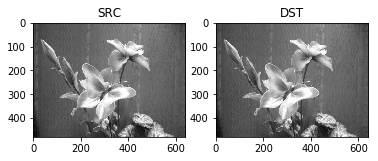

In [104]:
plt.subplot(121)
plt.imshow(gray,'gray')
plt.title('SRC')
plt.subplot(122)
plt.imshow(dst,'gray')
plt.title('DST')

In [113]:
dst = cal_linear_normalize(gray,10,-10)

147.91518229166667 32.62185


Text(0.5,1,'DST')

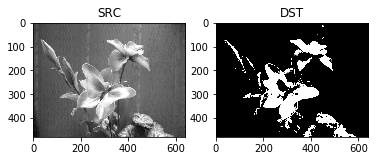

In [114]:
plt.subplot(121)
plt.imshow(gray,'gray')
plt.title('SRC')
plt.subplot(122)
plt.imshow(dst,'gray')
plt.title('DST')